# Generating Figure 1 from Kaiser et al. 2020

This is the same message at the beginning of all jupyter notebooks in this directory. 

If you don't have the below packages, you obviously need to install them for this to work. If it doesn't work still it's extremely likely you have an outdated version of one of the packages. Alternatively, some of the histogram functions actually rely on not being the most recent version because they changed from "normed" to something else from my recollection. Or perhaps it was the other way. I am aware this was poor decision-making, but it works (if you use the right version). ¯\\_(ツ)_/¯

Also pretty much all of these commands are copied and pasted from another Jupyter notebook I made but contained tons of tries at doing this stuff (and unrelated efforts) so that's why a lot of the variables seem unnecessary to use.

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from astropy.io import fits
from glob import glob
from astropy.time import Time
from astropy import coordinates as coords
from astropy import units as u
from astropy import constants as const
from astropy import convolution as conv
from astropy.table import Table, Column
import scipy.interpolate as scinterp
import time
start = time.time()

import spec_plot_tools as spt
import cal_params as cp
import plot_spec as ps

print(os.getcwd())

/Users/BenKaiser/Desktop/abd1714_Kaiser_et_al_2020_Science


In [5]:
target_dir= '/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/'
target_spec_file='ravg_fwctb.GaiaJ1644m0449_20190729_400m1.fits'
target_spec_file2='ravg_fwctb.GaiaJ1644m0449_20190825_tellcorr_400m2.fits'
model_spec_file='J1644_fit_flambda.dms'
#target_spec_file= glob(target_dir+target_spec_file)
#model_spec_file= glob(target_dir+model_spec_file)
print(target_spec_file)
print(model_spec_file)

ravg_fwctb.GaiaJ1644m0449_20190729_400m1.fits
J1644_fit_flambda.dms


I guess I have to just change the working directory instead of using a long file path for whatever reason...

In [6]:
os.chdir(target_dir)

In [7]:
target_spec, header, target_noise= spt.retrieve_spec(target_spec_file)
target_spec2,header2, target_noise2=spt.retrieve_spec(target_spec_file2)

In [12]:
model_spec= spt.retrieve_model_spec(model_spec_file)
model_spec[1]=model_spec[1]*1e16

In [13]:
og_model=np.copy(model_spec)

In [14]:
trim_spot=6800
tsm_target_spec=spt.clean_spectrum(target_spec,np.min(target_spec[0]), trim_spot,[])
tsm_target_spec2=spt.clean_spectrum(target_spec2,trim_spot, np.max(target_spec2[0]),[])
tmodel_spec=spt.clean_spectrum(og_model, np.nanmin(target_spec[0]), np.nanmax(target_spec2[0]),[])

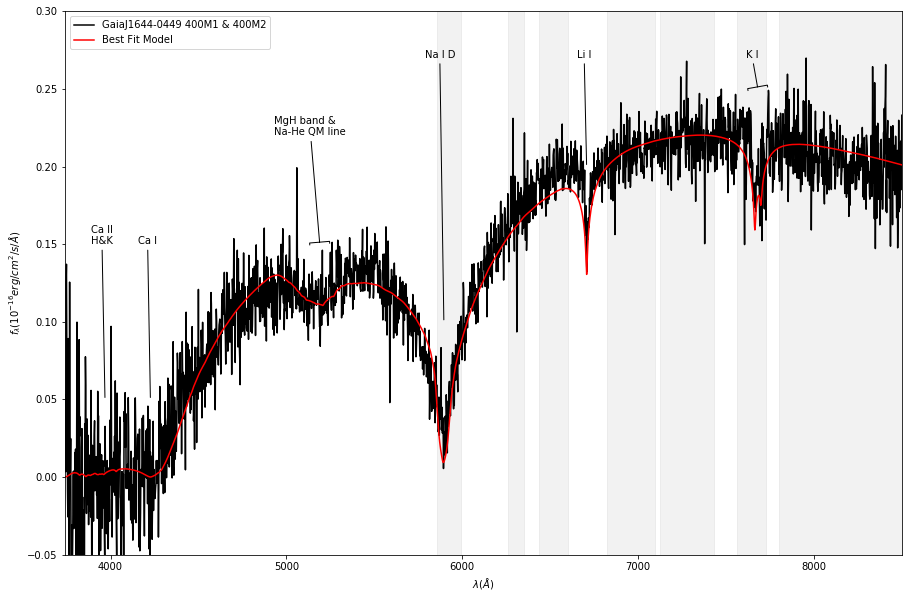

In [16]:
plt.rc('font',size=10)
fig= plt.figure(figsize=(15,10)) #from v1 description image size
label_pos=0.27
label_pos2= 0.15
label_off=110
plt.plot(tsm_target_spec[0],tsm_target_spec[1], label="GaiaJ1644-0449 400M1 & 400M2", color='k')
plt.plot(tsm_target_spec2[0],tsm_target_spec2[1], color='k')
plt.plot(tmodel_spec[0],tmodel_spec[1], label='Best Fit Model', color='r')
plt.xlim(np.nanmin(target_spec[0]), 8500)
plt.ylim(-0.05, 0.3)

k_spot=np.mean([7664.899016,7698.96445153])


plt.annotate('Na I D',xy=(5895.9241497669427, 0.1),xytext=(5895.9241497669427-label_off, label_pos), arrowprops=dict(arrowstyle='-'))
plt.annotate('Li I',xy=(6707.9080032878719, 0.2),xytext=(6707.9080032878719-55, label_pos), arrowprops=dict(arrowstyle='-'))
plt.annotate('Ca II\nH&K',xy=(3968.4672118153667, 0.05),xytext=(3968.4672118153667-80, label_pos2), arrowprops=dict(arrowstyle='-'))
plt.annotate('Ca I',xy=(4226.7295809531952, 0.05),xytext=(4226.7295809531952-70, label_pos2), arrowprops=dict(arrowstyle='-'))
plt.annotate('MgH band &\nNa-He QM line',xy=(5190, 0.15),xytext=(5190-260, label_pos-0.05), arrowprops=dict(arrowstyle='-['))
plt.annotate('K I',xy=(k_spot, 0.25),xytext=(k_spot-70, label_pos), arrowprops=dict(arrowstyle='-['))





#plt.xlim(6000,8000)
plt.ylabel(r'$f_{\lambda} (10^{-16} erg/ cm^{2}/s/ \AA)$')
plt.xlabel(r'$\lambda(\AA)$')
#spt.show_plot(line_id='alkali', label_pos=0.25, convert_to_air=True)
spt.show_plot(line_id='')